In [5]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass19_data = []
mass20_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []
illinois_pm_19_data = []
illinois_pm_20_data = []
illinois_oz_19_data = []
illinois_oz_20_data = []

In [6]:
# Create a DataFrame for California and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(sample_data_url, params = cali_params).json()
cali_data.append(cali_response)

cali_df = pd.DataFrame(cali_data[0]["Data"])
cali_df.head()


NameError: name 'sample_data_url' is not defined

In [ ]:
clean_cali_df=cali_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [ ]:
cali_df.isnull()

In [ ]:
cali_df.nsmallest(3, 'first_max_value')

In [ ]:
#Illinois 2019 and 2020 ozone 44201

illinois_oz_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_oz_19_response = requests.get(daily_data_url, params = illinois_oz_19_params).json()
illinois_oz_19_data.append(illinois_oz_19_response)

illinois_oz_19_df = pd.DataFrame(illinois_oz_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_oz_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_oz_20_response = requests.get(daily_data_url, params = illinois_oz_20_params).json()
illinois_oz_20_data.append(illinois_oz_20_response)

#create df for illinois 2020
illinois_oz_20_df = pd.DataFrame(illinois_oz_20_data[0]["Data"])
illinois_oz_20_df
#merge 2020
merge_illinois_oz_df = illinois_oz_19_df.append(illinois_oz_20_df)
merge_illinois_oz_df.head()

In [ ]:
#drop columns in Illinois DF. ozone Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_oz_clean_df = merge_illinois_oz_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_oz_clean_df.head()



#run ozone by 8 Hour Sample (used 24 hours because it provided a longer time frame, 8 hour only shows one year, 1 hour is nothing)
sample_duration_oz = illinois_oz_clean_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"
sample_duration_oz

illinois_oz_clean_df = illinois_oz_clean_df[sample_duration_oz]
illinois_oz_clean_df.head()

In [ ]:
#group Iliinois data ozone in dataframe with groupby
illinois_oz_group = pd.DataFrame(illinois_oz_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_oz_group.index
#convert index to datetime
illinois_oz_group.index = pd.to_datetime(illinois_oz_group.index)
#average data by months
monthly_oz_averages = illinois_oz_group.resample('M').mean()

# #plot aqi against time for each county ozone in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_oz_averages.index
y_values = monthly_oz_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

#Illinois 2019 and 2020 PM2.5

illinois_pm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_pm_19_response = requests.get(daily_data_url, params = illinois_pm_19_params).json()
illinois_pm_19_data.append(illinois_pm_19_response)

illinois_pm_19_df = pd.DataFrame(illinois_pm_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_pm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_pm_20_response = requests.get(daily_data_url, params = illinois_pm_20_params).json()
illinois_pm_20_data.append(illinois_pm_20_response)

#create df for illinois 2020
illinois_pm_20_df = pd.DataFrame(illinois_pm_20_data[0]["Data"])
illinois_pm_20_df
#merge 2020
merge_illinois_pm_df = illinois_pm_19_df.append(illinois_pm_20_df)
merge_illinois_pm_df.head()

In [ ]:
#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_nd_clean_df = merge_illinois_nd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_nd_clean_df.head()

#run nitrogen dioxideby 1 hour sample - only option
sample_duration_nd = illinois_nd_clean_df["sample_duration"] == "1 HOUR"
sample_duration_nd

illinois_nd_clean_df = illinois_nd_clean_df[sample_duration_nd]
illinois_nd_clean_df.head()

In [ ]:
#group Iliinois data nitrogen dioxide in dataframe with groupby
illinois_nd_group = pd.DataFrame(illinois_nd_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_nd_group.index
#convert index to datetime
illinois_nd_group.index = pd.to_datetime(illinois_nd_group.index)
#average data by months
monthly_nd_averages = illinois_nd_group.resample('M').mean()

# #plot aqi against time for each county nitrogen dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_nd_averages.index
y_values = monthly_nd_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

In [ ]:
# # Illinois 2019 and 2020 data for sulfur DIOXIDE

illinois_sd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # # Call to url for Illinois 2019
illinois_sd_19_response = requests.get(daily_data_url, params = illinois_sd_19_params).json()
illinois_sd_19_data.append(illinois_sd_19_response)

illinois_sd_19_df = pd.DataFrame(illinois_sd_19_data[0]["Data"])

# # create DF for Illinois 2020 and pull sulfur Data from APi
illinois_sd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

# #call url for Illinois 2020
illinois_sd_20_response = requests.get(daily_data_url, params = illinois_sd_20_params).json()
illinois_sd_20_data.append(illinois_sd_20_response)

# #create df for illinois 2020
illinois_sd_20_df = pd.DataFrame(illinois_sd_20_data[0]["Data"])
illinois_sd_20_df
#merge 2020
merge_illinois_sd_df = illinois_sd_19_df.append(illinois_sd_20_df)
merge_illinois_sd_df.head()

In [ ]:
# #drop columns in Illinois DF. Sulfur Dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_sd_df = merge_illinois_sd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_sd_df

# isolate data to 1 hour hour duration only sulfur dioxide; 24 and 3 hour samples are null

sample_duration_sd = illinois_clean_sd_df["sample_duration"] == "1 HOUR"
sample_duration_sd

illinois_clean_sd_df = illinois_clean_sd_df[sample_duration_sd]
illinois_clean_sd_df.head()

#group Iliinois data sulfur dioxide in dataframe with groupby
illinois_group_sd = pd.DataFrame(illinois_clean_sd_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_sd.index
#convert index to datetime
illinois_group_sd.index = pd.to_datetime(illinois_group_sd.index)
#average data by months
monthly_averages_sd = illinois_group_sd.resample('M').mean()


# #plot aqi against time for each county sulfur dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_sd.index
y_values = monthly_averages_sd['aqi']
plt.plot(x_values,y_values)


In [ ]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
merge_illinois_cm_df.head()

In [ ]:
#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_cm_df.head()

# isolate data to 8 hour duration only carbond monoxide, 1 hour is null

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()

#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
# illinois_cm_df =monthly_averages_cm.fillna(0)
# illinois_cm_df
# illinois_cm_df.index

#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_cm.index
y_values = monthly_averages_cm['aqi']
plt.plot(x_values,y_values)

In [ ]:
# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(sample_data_url, params = dc_params).json()
dc_data.append(dc_response)

dc_df = pd.DataFrame(dc_data[0]["Data"])
dc_df.head()

In [ ]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()

In [7]:
# Create a DataFrame for Mass and pull carbon monoxide data from API

# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass19_response = requests.get(daily_data_url, params = mass_params19).json()
mass19_data.append(mass19_response)

mass19_df = pd.DataFrame(mass19_data[0]["Data"])

#2020
mass_params20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass20_response = requests.get(daily_data_url, params = mass_params20).json()
mass20_data.append(mass20_response)

mass20_df = pd.DataFrame(mass20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_df = mass19_df.append(mass20_df)
# merge_mass_df

In [8]:
# Drop unnecessary columns to clean DF
clean_mass_df = merge_mass_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

# Filter out the 1-hour sample_duration and fix any null values
sample_duration = clean_mass_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_mass_df = clean_mass_df[sample_duration]

# Groupby date and fix null values
group_mass = pd.DataFrame(clean_mass_df.groupby(['date_local', 'county']).mean().unstack())
# group_mass = group_mass.fillna(0)


In [9]:
# Convert the date_local in the index into 'datetime' format
group_mass.index = pd.to_datetime(group_mass.index)

# Average out data on a per month basis
mass_monthly = group_mass.resample('M').mean()
mass_monthly.head()

latitude                        longitude                        \
county        Hampden    Suffolk  Worcester    Hampden    Suffolk  Worcester   
date_local                                                                     
2019-01-31  42.120229  42.328874  42.263955 -72.584503 -71.078748 -71.794322   
2019-02-28  42.120229  42.328267  42.263955 -72.584503 -71.075017 -71.794322   
2019-03-31  42.120229  42.328735  42.263955 -72.584503 -71.077891 -71.794322   
2019-04-30  42.120229  42.329212  42.263955 -72.584503 -71.080831 -71.794322   
2019-05-31  42.120229  42.328943  42.263955 -72.584503 -71.079176 -71.794322   

           arithmetic_mean                     first_max_value            \
county             Hampden   Suffolk Worcester         Hampden   Suffolk   
date_local                                                                 
2019-01-31        0.250861  0.251680  0.275547        0.436364  0.337097   
2019-02-28        0.234324  0.239252  0.306264        0.347059  0.303571   
2019-03-31        0.327738  0.230878  0.275403        0.553333  0.312903   
2019-04-30        0.368853  0.205066  0.224176        0.541667  0.251667   
2019-05-31        0.557143  0.192345  0.218164        0.600000  0.258065   

                     first_max_hour                           aqi            \
county     Worcester        Hampden   Suffolk Worcester   Hampden   Suffolk   
date_local                                                                    
2019-01-31  0.380645      10.909091  8.903226  8.096774  4.818182  3.725806   
2019-02-28  0.403846      10.176471  5.678571  8.153846  3.941176  3.303571   
2019-03-31  0.348387       9.133333  5.612903  5.322581  6.333333  3.500000   
2019-04-30  0.280769       9.833333  4.550000  8.115385  6.166667  2.616667   
2019-05-31  0.282143       1.000000  7.612903  7.071429  7.000000  2.677419   

                      
county     Worcester  
date_local            
2019-01-31  4.322581  
2019-02-28  4.615385  
2019-03-31  3.903226  
2019-04-30  2.846154  
2019-05-31  2.928571

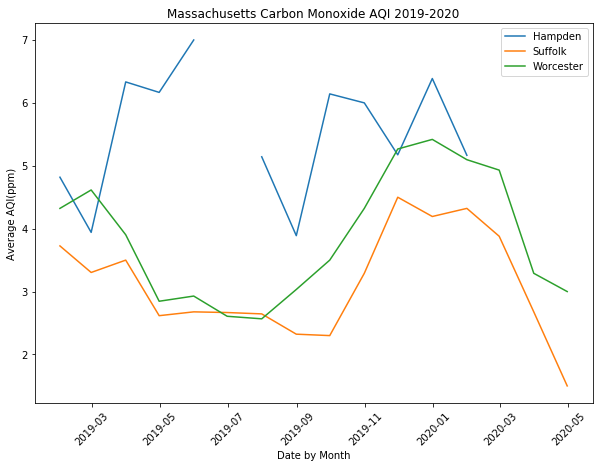

In [10]:
# Create first Line Chart for first_max_value of CO and data_local for Mass_df
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation = 45)
xvalue = mass_monthly.index
yvalue = mass_monthly['aqi']

plt.xlabel('Date by Month')
plt.ylabel('Average AQI(ppm)')
plt.title('Massachusetts Carbon Monoxide AQI 2019-2020')
plt.plot(xvalue, yvalue)
plt.legend(yvalue)
